In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./car details v4.csv')
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [3]:
df = df.dropna(axis=0)

In [4]:
pattern_pw = r'(\d+)(?:\s*bhp)?\s*@\s*(\d+)(?:\s*rpm)?'
df[['Power', 'Power RPM']] = df['Max Power'].str.extract(pattern_pw).astype(float)

In [5]:
pattern_trq = r'(\d+)(?:\s*Nm)?\s*@\s*(\d+)(?:\s*rpm)?'
df[['Torque', 'Torque RPM']] = df['Max Torque'].str.extract(pattern_trq).astype(float)

In [6]:
df = df.drop(columns=['Max Power', 'Max Torque'], axis=1)

In [7]:
df.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
Power                 0
Power RPM             0
Torque                0
Torque RPM            0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df):
    # Initialize a LabelEncoder
    label_encoder = LabelEncoder()
    
    # List of object type columns with missing values
    object_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    # Encode each object column
    for column in object_columns:
        df[column] = label_encoder.fit_transform(df[column])
    
    return df

In [9]:
encoded_df = encode_categorical_columns(df)

In [10]:
encoded_df['Price'] = np.log1p(encoded_df['Price'])

In [11]:
encoded_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power,Power RPM,Torque,Torque RPM
0,7,92,13.132316,2017,87150,5,1,56,7,0,...,1,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0,4500.0
1,18,731,13.017005,2014,75000,2,1,40,14,1,...,1,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0,2000.0
2,8,940,12.301387,2011,67000,5,1,39,8,0,...,1,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,7619.0,4000.0
3,29,453,13.591117,2019,37500,5,1,41,12,0,...,1,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0,4200.0
4,29,503,14.483340,2018,69000,2,1,45,7,0,...,2,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400.0,343.0,1400.0


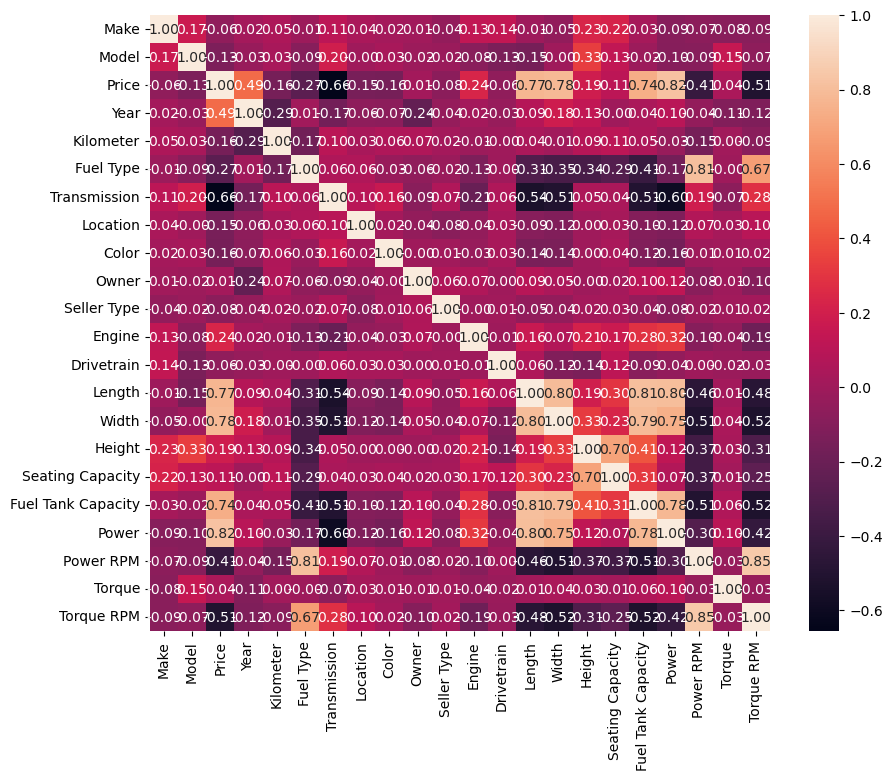

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, fmt=".2f")
plt.show()

In [18]:
corr_mat = encoded_df.corr()
price_corr = corr_mat['Price'].sort_values(ascending=False)
price_corr

Price                 1.000000
Power                 0.824324
Width                 0.780728
Length                0.772738
Fuel Tank Capacity    0.738904
Year                  0.487231
Engine                0.236333
Height                0.190843
Seating Capacity      0.110099
Torque                0.044968
Owner                 0.012507
Make                 -0.055051
Drivetrain           -0.055067
Seller Type          -0.076130
Model                -0.131620
Location             -0.147606
Color                -0.156017
Kilometer            -0.157703
Fuel Type            -0.267738
Power RPM            -0.411462
Torque RPM           -0.513523
Transmission         -0.656013
Name: Price, dtype: float64

In [24]:
# selecting features with higher than 0.10 or lower than -0.10 corr
selected_corr = price_corr[(price_corr > 0.10) | (price_corr < -0.10)]
selected_corr

Price                 1.000000
Power                 0.824324
Width                 0.780728
Length                0.772738
Fuel Tank Capacity    0.738904
Year                  0.487231
Engine                0.236333
Height                0.190843
Seating Capacity      0.110099
Model                -0.131620
Location             -0.147606
Color                -0.156017
Kilometer            -0.157703
Fuel Type            -0.267738
Power RPM            -0.411462
Torque RPM           -0.513523
Transmission         -0.656013
Name: Price, dtype: float64

In [26]:
selected_features = selected_corr.index.tolist()
selected_features

['Price',
 'Power',
 'Width',
 'Length',
 'Fuel Tank Capacity',
 'Year',
 'Engine',
 'Height',
 'Seating Capacity',
 'Model',
 'Location',
 'Color',
 'Kilometer',
 'Fuel Type',
 'Power RPM',
 'Torque RPM',
 'Transmission']

In [28]:
new_df = encoded_df[selected_features]
new_df.head()

,Price,Power,Width,Length,Fuel Tank Capacity,Year,Engine,Height,Seating Capacity,Model,Location,Color,Kilometer,Fuel Type,Power RPM,Torque RPM,Transmission
0,13.132316,87.0,1680.0,3990.0,35.0,2017,7,1505.0,5.0,92,56,7,87150,5,6000.0,4500.0,1
1,13.017005,74.0,1695.0,3995.0,42.0,2014,9,1555.0,5.0,731,40,14,75000,2,4000.0,2000.0,1
2,12.301387,79.0,1595.0,3585.0,35.0,2011,6,1550.0,5.0,940,39,8,67000,5,6000.0,4000.0,1
3,13.591117,82.0,1745.0,3995.0,37.0,2019,6,1510.0,5.0,453,41,12,37500,5,6000.0,4200.0,1
4,14.483340,148.0,1830.0,4735.0,55.0,2018,58,1795.0,7.0,503,45,7,69000,2,3400.0,1400.0,1


In [31]:
X = new_df.drop(columns=['Price'], axis=1)
y = new_df['Price']

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [34]:
from pycaret import *
from pycaret.regression import *

In [35]:
exp_1 = setup(data=X, target=y)
best_model = compare_models()

,Description,Value
0,Session id,7385
1,Target,Price
2,Target type,Regression
3,Original data shape,"(1874, 17)"
4,Transformed data shape,"(1874, 17)"
5,Transformed train set shape,"(1311, 17)"
6,Transformed test set shape,"(563, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.1360,0.0415,0.1990,0.9544,0.0132,0.0098,0.0200
et,Extra Trees Regressor,0.1451,0.0447,0.2080,0.9504,0.0139,0.0105,0.0360
gbr,Gradient Boosting Regressor,0.1481,0.0465,0.2127,0.9484,0.0141,0.0107,0.0260
rf,Random Forest Regressor,0.1486,0.0499,0.2189,0.9449,0.0146,0.0107,0.0540
lr,Linear Regression,0.1993,0.0777,0.2771,0.9134,0.0187,0.0144,0.1730
ridge,Ridge Regression,0.1993,0.0777,0.2771,0.9134,0.0187,0.0144,0.0040
br,Bayesian Ridge,0.1987,0.0779,0.2774,0.9133,0.0187,0.0143,0.0040
lar,Least Angle Regression,0.2054,0.0785,0.2785,0.9119,0.0188,0.0148,0.0040
ada,AdaBoost Regressor,0.2157,0.0876,0.2933,0.9036,0.0195,0.0155,0.0170
dt,Decision Tree Regressor,0.2052,0.0991,0.3068,0.8906,0.0204,0.0148,0.0050
